Reference: Professor Ami Gates, Dept. Applied Math, Data Science, University of Colorado

[Dr. Gates' Website](https://gatesboltonanalytics.com/?page_id=888)

---


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd

# Getting the data loaded and ready

Other similar datasets....
```
mnist = tf.keras.datasets.mnist 
Data_=tf.keras.datasets.imdb
```

In [2]:
Data_=tf.keras.datasets.fashion_mnist
## Load the data....
(x_train, y_train),(x_test, y_test) = Data_.load_data()

## What does the data look like?

The first value of x_test is 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0

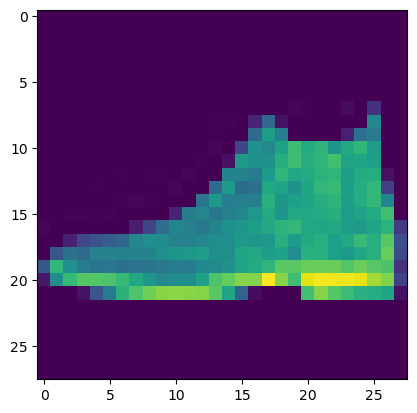

In [3]:
print("The first value of x_test is \n", x_test[0])
print("The shape of x_test is \n", x_test.shape)
print("The first value of x_train is \n", x_train[0])
print("The shape of x_train is \n", x_train.shape)
print("The first value of y_test is \n", y_test[0])
print("The shape of y_test is \n", y_test.shape)
print("The first value of y_train is \n", y_train[0])
print("The shape of y_train is \n", y_train.shape)
print("The first few values of y_test are \n", y_test[0:3])

print("The first value - label - of y-test is a ",y_test[0], "and it looks like this:\n")
plt.imshow(x_test[0]) ## NOTICE that to see the image you need x_test[0] and to see the numeric label you need y_test[0]

## Data Normalization

### BEFORE

In [4]:
print("Before normalization - x_train[0] is \n", x_train[0])

Before normalization - x_train[0] is 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0

### AFTER

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print("After normalization - x_train[0] is \n", x_train[0])

After normalization - x_train[0] is 
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.    

**NOTE** - we DO NOT normalize y. Why not?

# Using Keras

## Step 1: Create a TF - Keras NN Model

<https://keras.io/guides/sequential_model/>

### The Sequential Model:

- A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
- Tensors are multi-dimensional arrays with a uniform type.
- A tensor with one dimension can be thought of as a vector, 
- A tensor with two dimensions as a matrix and 
- A tensor with three dimensions can be thought of as a cuboid. 
- A Sequential model is **not** appropriate when:
    - Your model has multiple inputs or multiple outputs
    - Any of your layers has multiple inputs or multiple outputs
    - etc. 

All layers in Keras need to know the shape of their inputs in order to be able to create their weights.

In [6]:
NN_Model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), ##(None,784)
  # Dense implements the operation: 
      ## output = activation(dot(input, kernel) + bias)
      ## The "kernel" are the weights matrix.
  tf.keras.layers.Dense(128, activation='relu'), #https://keras.io/api/layers/core_layers/dense/
  ## The first value, 128 here, are the units.
  ## units: Positive integer, dimensionality of the output space.
  ## Here, x_train is (60000,28,28)
  ## This Dense Layer output will be (None, 128)
  ## https://www.tutorialspoint.com/keras/keras_dense_layer.htm
  
  tf.keras.layers.Dropout(0.2), ##(None, 128)
  tf.keras.layers.Dense(10, activation='softmax') ## (None, 10)
])
    
NN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### `Dense` Keras layer
`Dense` implements the operation: 
```
output = activation(dot(input, kernel) + bias)
```
The "`kernel`" are the weights matrix.

<https://keras.io/api/layers/core_layers/dense/>

```
tf.keras.layers.Dense(128, activation='relu')
```
- The first value, `128` here, are the units.
    - units: Positive integer, dimensionality of the output space.
- Here, `x_train` is `(60000,28,28)`
- This Dense Layer output will be `(None, 128)`

<https://www.tutorialspoint.com/keras/keras_dense_layer.htm>


## Step 2: Compile the Model


In [7]:
NN_Model.compile(
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"],
                 optimizer='adam'
                 
                 )

## Step 3 - Fit the Model to the data (train the model)

Making the number of epochs larger can improve the model and prediction accuracy

In [8]:
Hist=NN_Model.fit(x_train,y_train, epochs=3,validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5308 - accuracy: 0.8099 - val_loss: 0.4226 - val_accuracy: 0.8502
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3967 - accuracy: 0.8547 - val_loss: 0.3774 - val_accuracy: 0.8647
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3657 - accuracy: 0.8644 - val_loss: 0.3859 - val_accuracy: 0.8580


# History and Accuracy

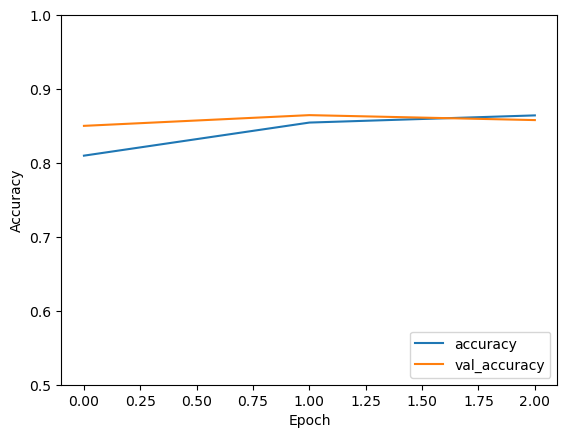

In [9]:
plt.plot(Hist.history['accuracy'], label='accuracy')
plt.plot(Hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Test and Model

In [10]:
Test_Loss, Test_Accuracy = NN_Model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3859 - accuracy: 0.8580


# Save the Model

In [11]:
NN_Model.save("MNIST_Example1_NN_Model")

INFO:tensorflow:Assets written to: MNIST_Example1_NN_Model\assets


# Predictions
RE: <https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data>

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.         0.2627451  0.69411765
  0.50588235 0.6        0.45882353 0.50588235 0.57254902 0.55294118
  0.68627451 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00784314 0.         0.76862745 1.
  1.         1.         0.94509804 0.98431373 1.         0.96078431
  1.         0.29803922 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.95294118 0.92941176
  0.85098039 0.89411765 0.90588235 0.87058824 0.85490196 0.85882353
  1.         0.45490196 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.  

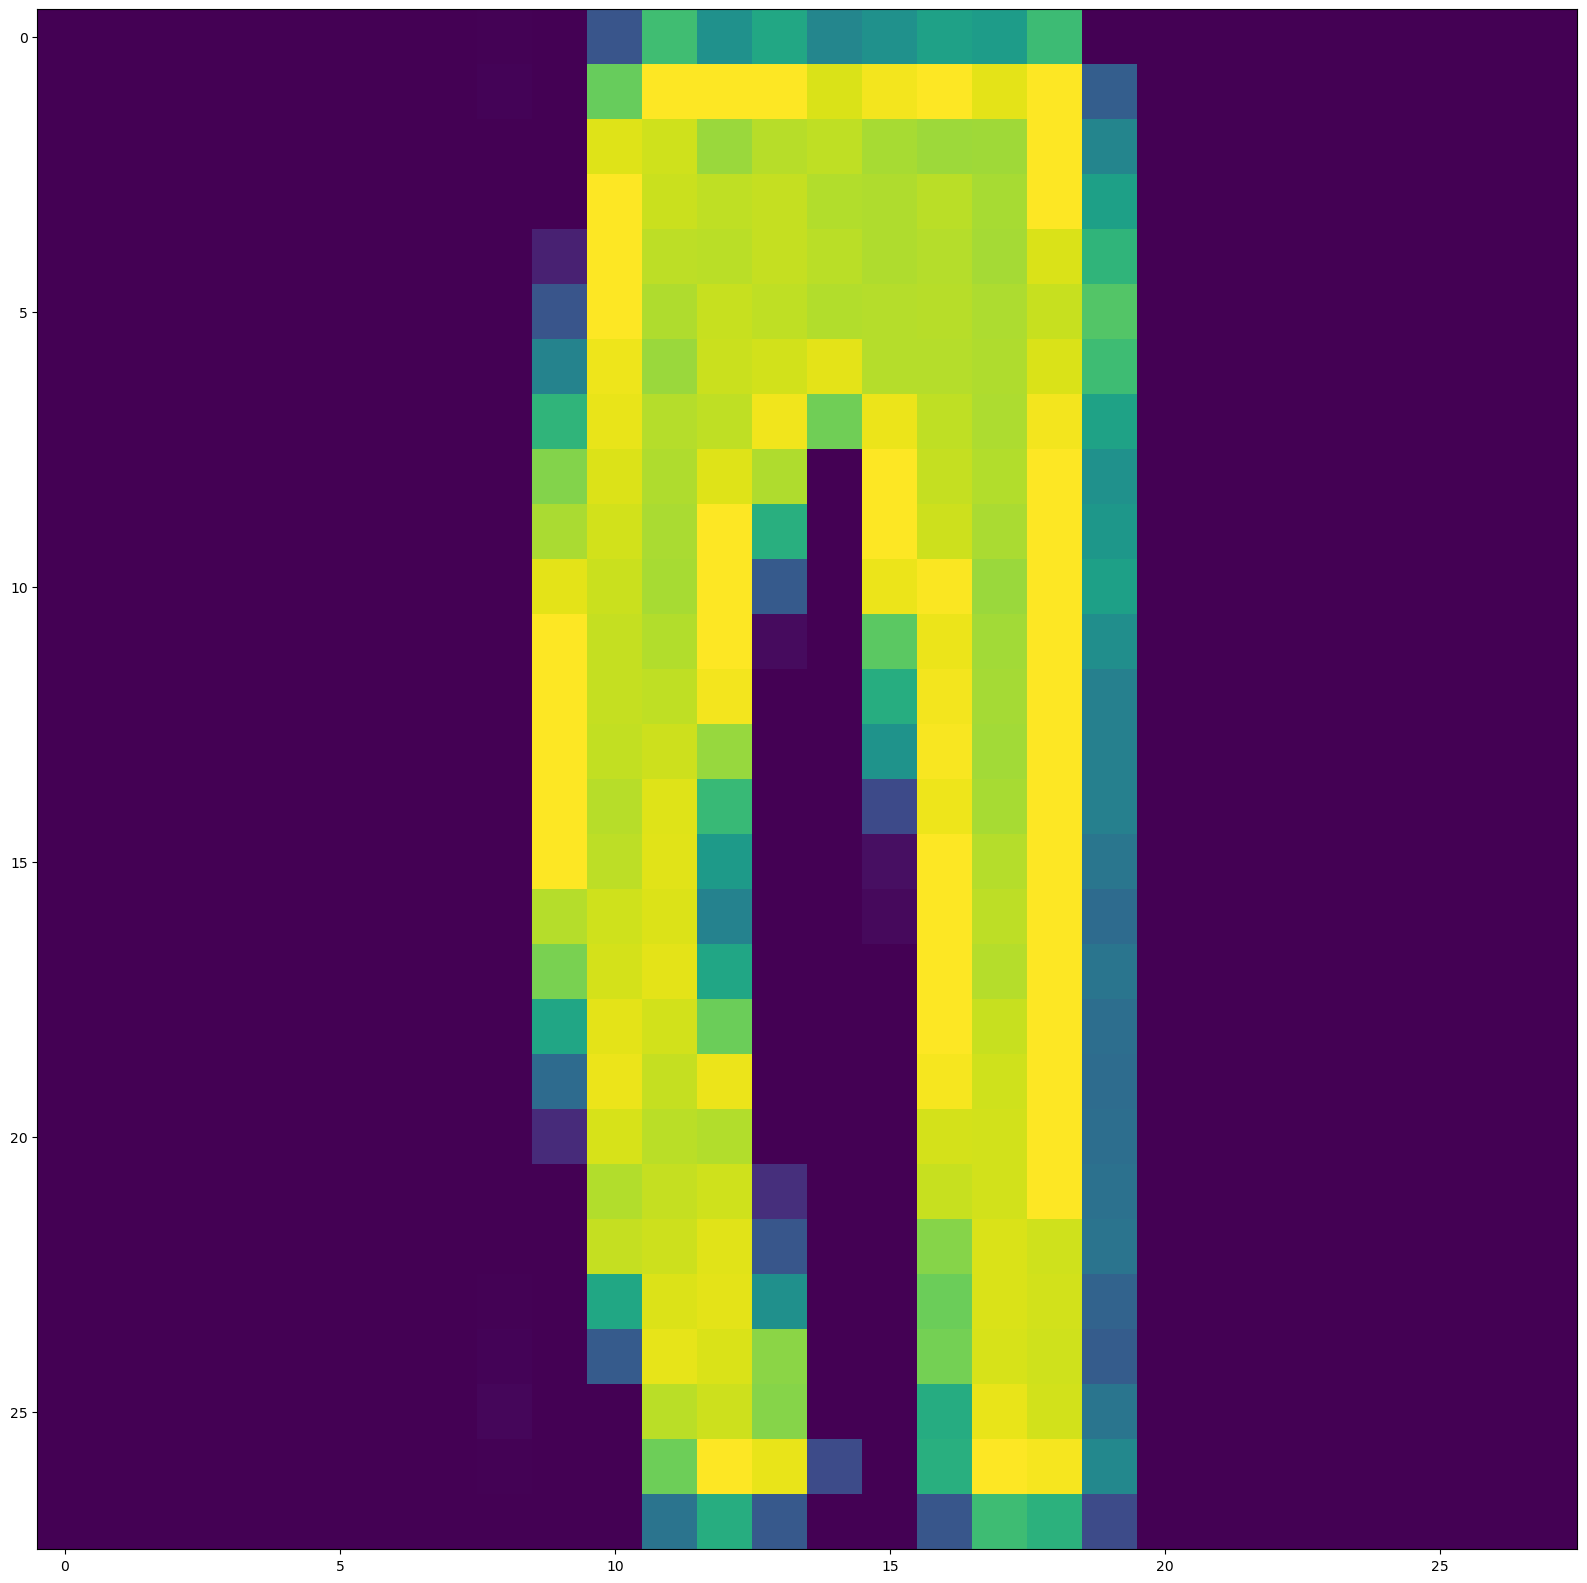

In [12]:
print(x_test[2])
print(x_test[2].shape)
plt.figure(figsize = (20,20))
plt.imshow(x_test[2]) ## x_test[2] is the third test vector. Its label is a 1
print("The label of this test image is \n", y_test[2])  ## Label of x_test[2]

## All predictions

In [13]:
predictions=NN_Model.predict([x_test])
print("All of the predictions for the test data are \n", predictions) ## All the predictions (all 10,000)
print("The single prediction vector for x_test[2] is \n", predictions[2]) ## Just the third prediction
print("The max - final prediction label for x_test[2] is\n", np.argmax(predictions[2])) ## The argmax of the third prediction - this is the label

313/313 [==============================] - 1s 2ms/step
All of the predictions for the test data are 
 [[3.26962390e-06 1.60524723e-06 1.51764937e-06 ... 8.10598023e-03
  5.02515577e-05 9.61238503e-01]
 [1.86777452e-05 1.23281152e-09 9.96375918e-01 ... 4.64459504e-12
  1.06411555e-08 5.62115784e-13]
 [4.11614650e-07 9.99999225e-01 3.69419126e-08 ... 1.17997881e-14
  6.09170769e-10 4.48443264e-14]
 ...
 [1.46703818e-03 2.02914183e-08 3.30298033e-04 ... 8.90591036e-06
  9.95875478e-01 2.80911436e-08]
 [1.82080910e-07 9.99971688e-01 8.05895937e-08 ... 2.42464555e-11
  1.30697524e-08 2.26461488e-10]
 [1.00976315e-04 1.47972223e-05 1.21575074e-04 ... 1.30586671e-02
  3.21544008e-03 3.20462277e-04]]
The single prediction vector for x_test[2] is 
 [4.11614650e-07 9.99999225e-01 3.69419126e-08 1.13407005e-07
 1.64193878e-07 9.40884783e-12 2.60632582e-09 1.17997881e-14
 6.09170769e-10 4.48443264e-14]
The max - final prediction label for x_test[2] is
 1


### Print the prediction to compare

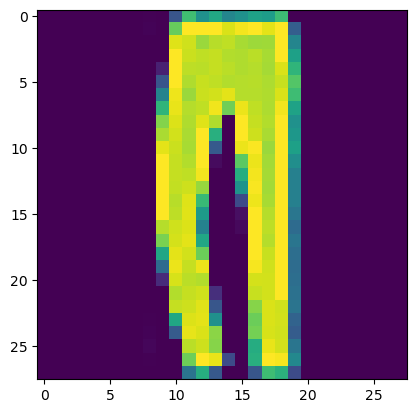

In [14]:
GetPredictedImage=x_test[y_test==np.argmax(predictions[2])][0]
## The above prints the first example that matches the predicted label
plt.imshow(GetPredictedImage)

# Confusion Matrix and Accuracy - and Visual Options

In [15]:
print("The test accuracy is \n", Test_Accuracy)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("The prediction accuracy via confusion matrix is:\n")
print(y_test)
print(predictions)
print(predictions.shape)  ##(10000,10)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1)))
print(Max_Values)
print(np.argmax([predictions]))
print(confusion_matrix(Max_Values, y_test))

The test accuracy is 
 0.8579999804496765
The prediction accuracy via confusion matrix is:

[9 2 1 ... 8 1 5]
[[3.26962390e-06 1.60524723e-06 1.51764937e-06 ... 8.10598023e-03
  5.02515577e-05 9.61238503e-01]
 [1.86777452e-05 1.23281152e-09 9.96375918e-01 ... 4.64459504e-12
  1.06411555e-08 5.62115784e-13]
 [4.11614650e-07 9.99999225e-01 3.69419126e-08 ... 1.17997881e-14
  6.09170769e-10 4.48443264e-14]
 ...
 [1.46703818e-03 2.02914183e-08 3.30298033e-04 ... 8.90591036e-06
  9.95875478e-01 2.80911436e-08]
 [1.82080910e-07 9.99971688e-01 8.05895937e-08 ... 2.42464555e-11
  1.30697524e-08 2.26461488e-10]
 [1.00976315e-04 1.47972223e-05 1.21575074e-04 ... 1.30586671e-02
  3.21544008e-03 3.20462277e-04]]
(10000, 10)
[9 2 1 ... 8 1 5]
761
[[845   1  14  29   0   0 167   0   4   0]
 [  0 970   1   9   0   0   2   0   1   0]
 [ 21   1 849  10 217   0 162   0  11   0]
 [ 39  23   9 867  24   0  30   0   3   0]
 [  2   2  86  48 728   0 101   0   6   0]
 [  0   0   0   0   0 949   0  15   2   2

## Pretty Confusion Matrix

In [17]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = confusion_matrix(y_test, Max_Values, labels=labels)
print(cm)

[[845   0  21  39   2   0  82   0  11   0]
 [  1 970   1  23   2   0   1   0   2   0]
 [ 14   1 849   9  86   0  40   0   1   0]
 [ 29   9  10 867  48   0  34   0   3   0]
 [  0   0 217  24 728   0  29   0   2   0]
 [  0   0   0   0   0 949   0  28   1  22]
 [167   2 162  30 101   0 525   0  13   0]
 [  0   0   0   0   0  15   0 908   0  77]
 [  4   1  11   3   6   2   5   4 964   0]
 [  0   0   0   0   0   2   1  22   0 975]]


[Text(0, 0.5, '0:T-shirt/top'),
 Text(0, 1.5, '1:Trouser'),
 Text(0, 2.5, '2:Pullover'),
 Text(0, 3.5, '3:Dress'),
 Text(0, 4.5, '4:Coat'),
 Text(0, 5.5, '5:Sandal'),
 Text(0, 6.5, '6:Shirt'),
 Text(0, 7.5, '7:Sneaker'),
 Text(0, 8.5, '8:Bag'),
 Text(0, 9.5, '9:Ankle boot')]

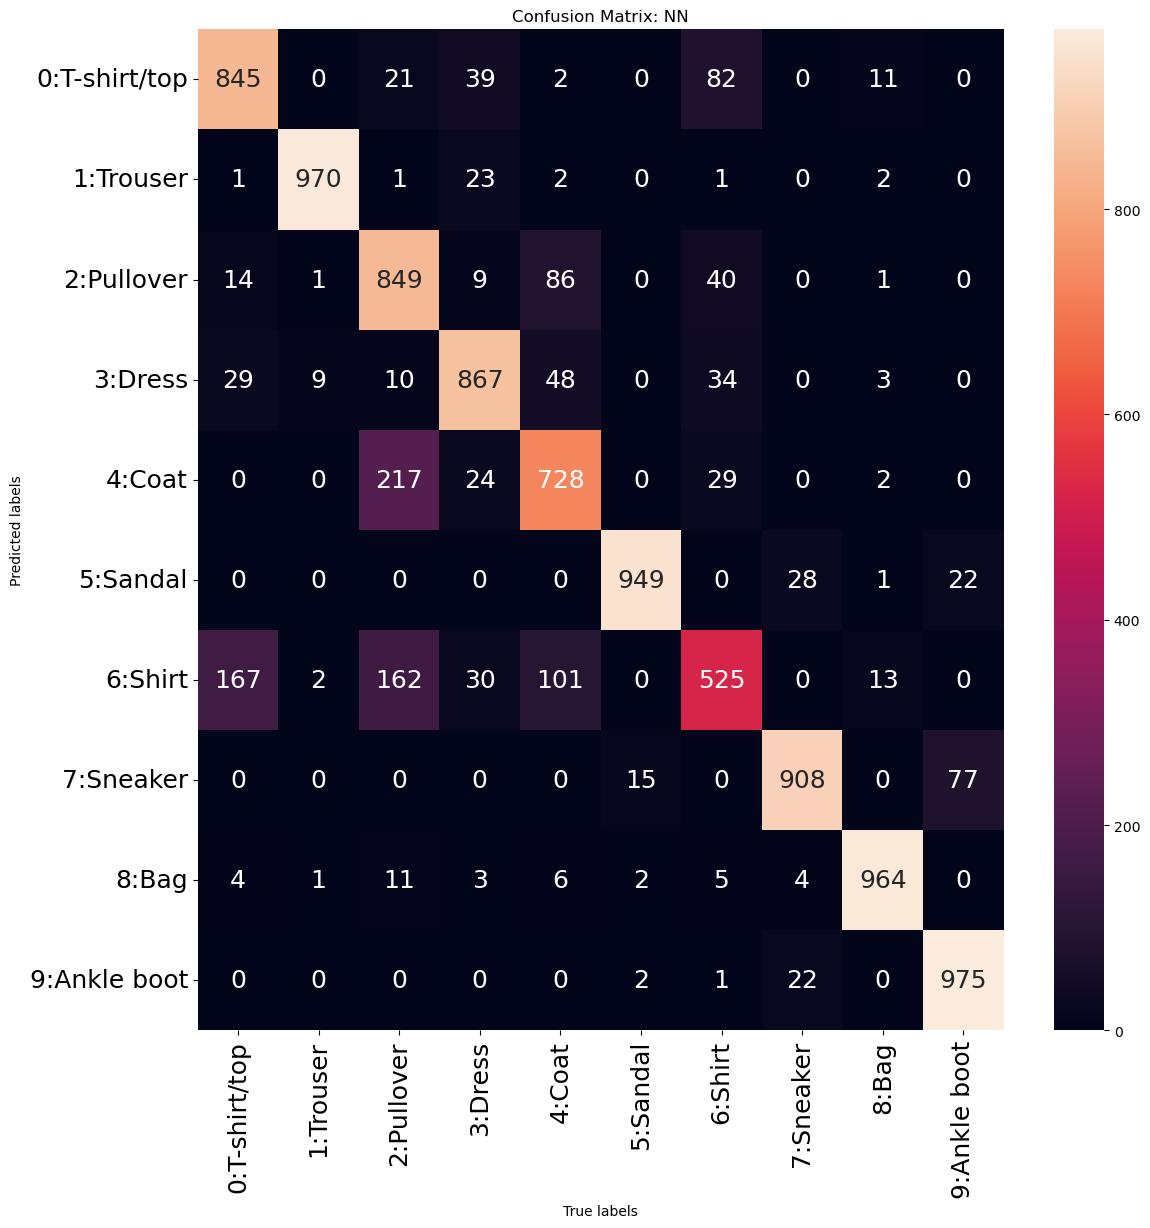

In [18]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(13,13)) 
#ax= plt.subplot()
#sns.set(font_scale=3)
#sns.set (rc = {'figure.figsize':(40, 40)})
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
#annot=True to annotate cells, ftm='g' to disable scientific notation
# annot_kws si size  of font in heatmap
# labels, title and ticks
ax.set_xlabel('True labels') 
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix: NN') 
ax.xaxis.set_ticklabels(["0:T-shirt/top","1:Trouser",
                         "2:Pullover","3:Dress","4:Coat",
                         "5:Sandal","6:Shirt","7:Sneaker",
                         "8:Bag","9:Ankle boot"],rotation=90, fontsize = 18)

ax.yaxis.set_ticklabels(["0:T-shirt/top","1:Trouser","2:Pullover",
                         "3:Dress","4:Coat","5:Sandal","6:Shirt",
                         "7:Sneaker","8:Bag","9:Ankle boot"],rotation=0, fontsize = 18)